In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from IPython.display import display

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

The number of global minimum is: 2

Their coordinates are:
[[-0.0898  0.7127]
 [ 0.0898 -0.7127]]

At the global minima the value of f is: -1.0316

For an initial guess of (x,y)=(0,0) the minimize function gives this result:
      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])


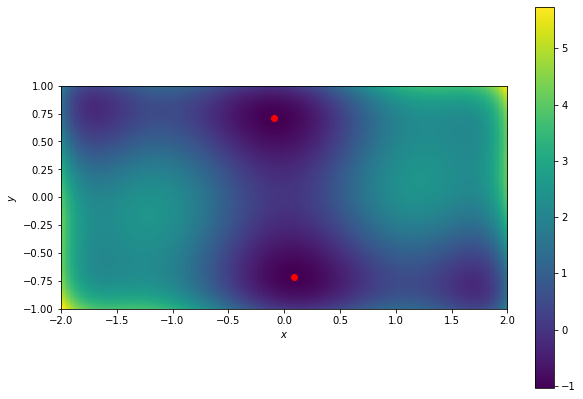

In [3]:
#Exercise 1

def f(variables):
    x = variables[0]
    y = variables[1]
    return (4-2.1*x**2+x**4/3)*x**2+x*y+(4*y**2-4)*y**2

x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)

X,Y = np.meshgrid(x, y, sparse=True)

plt.figure(figsize=(10,7))
plt.imshow(f([X,Y]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('$y$')

mins = []
f_mins = []
for i in np.arange(-2,2,0.5):
    for j in np.arange(-1,1,0.5):
        min_f = optimize.minimize(f,x0=(i,j))
        mins.append(np.around(min_f.x,decimals=4))
        f_mins.append(np.around(f(min_f.x),decimals=4))

f_mins = np.array(f_mins)
mins = np.array([mins[i] for i in range(len(mins)) if f_mins[i] == np.min(f_mins)])
mins = np.unique(mins, axis=0)

plt.plot(mins[0][0],mins[0][1],color='red',marker='o')
plt.plot(mins[1][0],mins[1][1],color='red',marker='o');

print('The number of global minimum is:', len(mins))
print('\nTheir coordinates are:')
print(mins)
print('\nAt the global minima the value of f is:', np.min(f_mins))
print('\nFor an initial guess of (x,y)=(0,0) the minimize function gives this result:')
print(optimize.minimize(f,x0=(0,0)))

plt.show()


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

From the plot the max/min temperature function seems to be a gaussian function.

Results for maximum temperature:
C = 23.0921 +- 1.1527
mu = 6.7358 +- 0.0795
sig = -2.2944 +- 0.1660
offset = 15.7794 +- 1.1766

Results for minimum temperature:
C = 52.6493 +- 1.4033
mu = 7.1645 +- 0.0472
sig = -1.9759 +- 0.0760
offset = -61.3209 +- 1.1888

R for max T is 0.9929
R for min T is 0.9973
The fit is resonable in both cases.

The time offset (that corrisponds to the paramiter mu of the gaussians) is not the same within the fit accuracy.
In fact their compatibility is: 4.64


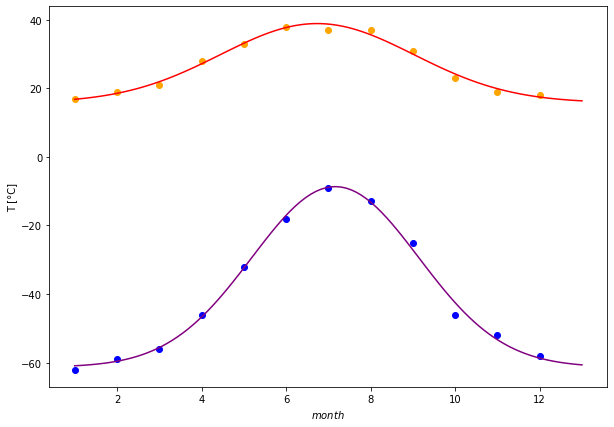

In [36]:
#Exercise 2

max_t = np.array([17,19,21,28,33,38,37,37,31,23,19,18])
min_t = np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])
months = np.arange(1,13,1)

plt.figure(figsize=(10,7))
plt.plot(months,max_t,color='orange',marker='o',linewidth=0)
plt.plot(months,min_t,color='blue',marker='o',linewidth=0)

print('From the plot the max/min temperature function seems to be a gaussian function.')

x = np.linspace(1,13,100)
def gaus(x,c,mu,sig,off):
    return c*np.exp(-(x-mu)**2/(2*sig**2)) + off

popt1, pcov1 = optimize.curve_fit(gaus,months,max_t)
plt.plot(x,gaus(x,popt1[0],popt1[1],popt1[2],popt1[3]),color='red')

popt2, pcov2 = optimize.curve_fit(gaus,months,min_t)
plt.plot(x,gaus(x,popt2[0],popt2[1],popt2[2],popt2[3]),color='purple')

plt.xlabel('$month$')
plt.ylabel('T [°C]')

print('\nResults for maximum temperature:')
print('C = %.4f +- %.4f' %(popt1[0],np.sqrt(pcov1[0,0])))
print('mu = %.4f +- %.4f' %(popt1[1],np.sqrt(pcov1[1,1])))
print('sig = %.4f +- %.4f' %(popt1[2],np.sqrt(pcov1[2,2])))
print('offset = %.4f +- %.4f' %(popt1[3],np.sqrt(pcov1[3,3])))

print('\nResults for minimum temperature:')
print('C = %.4f +- %.4f' %(popt2[0],np.sqrt(pcov2[0,0])))
print('mu = %.4f +- %.4f' %(popt2[1],np.sqrt(pcov2[1,1])))
print('sig = %.4f +- %.4f' %(popt2[2],np.sqrt(pcov2[2,2])))
print('offset = %.4f +- %.4f' %(popt2[3],np.sqrt(pcov2[3,3])))

ssr_max = np.sum((max_t - gaus(months,popt1[0],popt1[1],popt1[2],popt1[3]))**2)
ssr_min = np.sum((min_t - gaus(months,popt2[0],popt2[1],popt2[2],popt2[3]))**2)
tss_max = np.sum((np.mean(max_t) - max_t)**2)
tss_min = np.sum((np.mean(min_t) - min_t)**2)

R_max = np.sqrt(1-ssr_max/tss_max)
R_min = np.sqrt(1-ssr_min/tss_min)

print('\nR for max T is %.4f' %R_max)
print('R for min T is %.4f' %R_min)
print('The fit is resonable in both cases.')

acc = np.abs(popt1[1]-popt2[1])/np.sqrt(pcov1[1,1]+pcov2[1,1])
print('\nThe time offset (that corrisponds to the paramiter mu of the gaussians) is not the same within the fit accuracy.')
print('In fact their compatibility is: %.2f' %acc)



3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

1460.8115160413756
p-value: 0.0
The fit is unsatisfactory


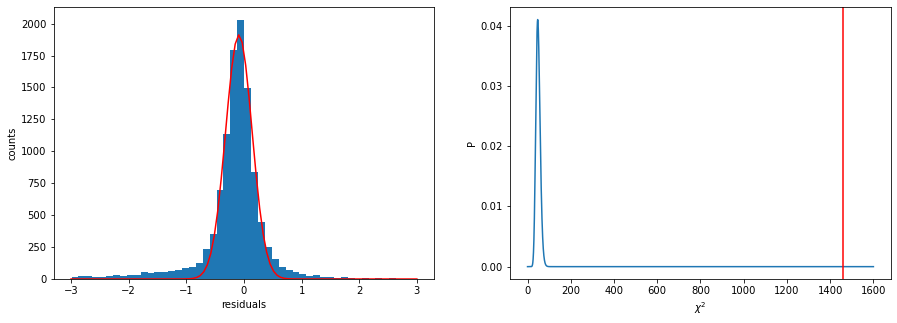

In [37]:
#Exercise 3

file = np.load('residuals_261.pkl', allow_pickle=True)
data = file.tolist()
df = pd.DataFrame(data)
df_p = df[abs(df['residuals']) < 3]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

n_bin = 50
ax1.hist(df_p['residuals'],bins=n_bin)

counts, bin_edges = np.histogram(df_p['residuals'],bins=n_bin)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
err = counts**(1/2)

x = np.linspace(-3,3,100)
def gaus(x,c,mu,sig):
    return c*np.exp(-(x-mu)**2/(2*sig**2))

popt, pcov = optimize.curve_fit(gaus,bin_centres,counts)
ax1.plot(x,gaus(x,popt[0],popt[1],popt[2]),color='red')
ax1.set_ylabel('counts')
ax1.set_xlabel('residuals')

chi2 = np.sum((counts - gaus(bin_centres,popt[0],popt[1],popt[2]))**2/err**2)
print(chi2)

p = np.arange(0, 1600, 0.1)
ax2.plot(p, stats.chi2.pdf(p, df=len(counts)-1))
ax2.axvline(chi2, color='r')
ax2.set_xlabel('$\u03C7^2$')
ax2.set_ylabel('P')

pvalue = 1. - stats.chi2.cdf(chi2, len(counts)-1)
print('p-value:', pvalue)
print('The fit is unsatisfactory')



4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

The best fit values are:
a = -9.6713 +- 0.1762
b = 12.3427 +- 0.0183
c = 9.0526 +- 0.1248

The overall average temperature is: 9.39°C
The average temperature predicted for the hottest time of the year is: 18.72°C
The average temperature predicted for the coldest time of the yaer is: -0.62°C

The 'b' parameter is a shift in time which ensure that first and last months of the year are the coldest.
The best fit values are:
a = -9.6716 +- 0.1763
b = 0.9997 +- 0.0006
c = 15.6213 +- 6.9490
d = 9.0514 +- 0.1248

RSS for f is: 251358.36231938173
RSS for g is: 249527.71166206987
CL: 0.0011 , additional parameter necessary: YES


<ipython-input-38-56d371ce91ac>:37: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,g(t,popt2[0],popt2[1],popt2[2],popt2[3]),color='yellow',linewidth=1.5,LineStyle='--');


0.0011027619512238296

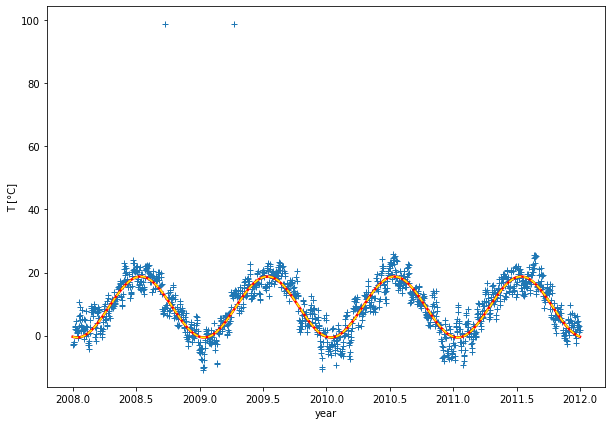

In [38]:
#Exercise 4

file = pd.read_csv('munich_temperatures_average_with_bad_data.txt', delimiter=' ', names=['year','temperature'])
df = pd.DataFrame(file)
idx_1 = df.index[df['year'] >= 2008][0]
idx_2 = df.index[df['year'] <= 2012][-1]
data = df[idx_1:idx_2]

t = np.linspace(2008,2012,len(data))
def f(t,a,b,c):
    return a*np.cos(2*np.pi*t + b) + c

popt1, pcov1 = optimize.curve_fit(f,df['year'],df['temperature'])

plt.figure(figsize=(10,7))
plt.plot(data['year'],data['temperature'],marker='+',linewidth=0)
plt.plot(t,f(t,popt1[0],popt1[1],popt1[2]),color='red',linewidth=2.5)
plt.xlabel('year')
plt.ylabel('T [°C]')

print('The best fit values are:')
print('a = %.4f +- %.4f' %(popt1[0],np.sqrt(pcov1[0,0])))
print('b = %.4f +- %.4f' %(popt1[1],np.sqrt(pcov1[1,1])))
print('c = %.4f +- %.4f\n' %(popt1[2],np.sqrt(pcov1[2,2])))

print('The overall average temperature is: %.2f°C' %data['temperature'].mean())
print('The average temperature predicted for the hottest time of the year is: %.2f°C' %np.max(f(t,popt1[0],popt1[1],popt1[2])))
print('The average temperature predicted for the coldest time of the yaer is: %.2f°C\n' %np.min(f(t,popt1[0],popt1[1],popt1[2])))

print('The \'b\' parameter is a shift in time which ensure that first and last months of the year are the coldest.')

def g(t,a,b,c,d):
    return a*np.cos(2*np.pi*b*t + c) + d

popt2, pcov2 = optimize.curve_fit(g,df['year'],df['temperature'])

plt.plot(t,g(t,popt2[0],popt2[1],popt2[2],popt2[3]),color='yellow',linewidth=1.5,LineStyle='--');

print('The best fit values are:')
print('a = %.4f +- %.4f' %(popt2[0],np.sqrt(pcov2[0,0])))
print('b = %.4f +- %.4f' %(popt2[1],np.sqrt(pcov2[1,1])))
print('c = %.4f +- %.4f' %(popt2[2],np.sqrt(pcov2[2,2])))
print('d = %.4f +- %.4f\n' %(popt2[3],np.sqrt(pcov2[3,3])))

res_f = np.sum(f(t,popt1[0],popt1[1],popt1[2]) - data['temperature'])**2
res_g = np.sum(g(t,popt2[0],popt2[1],popt2[2],popt2[3]) - data['temperature'])**2


print('RSS for f is:', res_f)
print('RSS for g is:', res_g)

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.4f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

Ftest(res_f,res_g,2,3,len(data),verbose=True)
